<a href="https://colab.research.google.com/github/alisiina/finance/blob/master/PyEcon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercises to the [Python for Econometrics in Economics](https://pyecon.org/) course, from the University of Goettingen in April 2018 by Fabian Raters. I  used the resources of this course for my own Eonometrics course in my undergraduate studies at Wuhan University.

This is my Google Colab practice as well, to get familiar with working in this environment.

---
#Exercise A
## Exercise 1

Create a function with takes a vector $v=(v_1, \dots, v_n)$ and returns the Vandermonde_Matrix $V$:

 $$
V = \left(\begin{array}{ccccc} 
1 & v_1 & v_1^2 & \dots & v_1^{n-1}\\
1 & v_2 & v_2^2 & \dots & v_2^{n-1}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
1 & v_n & v_n^2 & \dots & v_n^{n-1}\\
\end{array} \right)
$$

In [0]:
import numpy as np
v = np.array([1, 2, 3, 4])

In [0]:
def vandermonde(v):
  n = len(v)
  x = v
  l = np.arange(n)
  y = l
  for i in range(n-1):
    v = np.append(v, x)
    l = np.append(l, y)
  V = v.reshape((n, n)).T
  B = l.reshape((n, n))
  return V**B

In [5]:
vandermonde(v)

array([[ 1,  1,  1,  1],
       [ 1,  2,  4,  8],
       [ 1,  3,  9, 27],
       [ 1,  4, 16, 64]])

## Exercise 2
Create a function that takes a vector $v=(v_1, \dots, v_n)$ and returns the mean and sum of the vector.

1. Solve the task by using NumPy.
2. Solve the task without importing modules.

In [6]:
# 1
y = np.array([1, 2, 3, 4])

def meansum(v):
  return v.mean(), v.sum()

meansum(v)

(2.5, 10)

In [7]:
#2
y = [1, 2, 3, 4]

def summean(v):
  x = 0
  for i in v:
    x += i
  return x / len(v), x

summean(y)

(2.5, 10)

## Exercise 3
Use NumPy to check if the following vectors are linearly independent:

$$
v_1=
\left( \begin{array}{c} 0 \\ 1 \\ 2 \\ 1 \end{array} \right), 
\ v_2=
\left( \begin{array}{c} 4 \\ 2 \\ 2 \\ 2 \end{array} \right),
\ v_3=
 \left( \begin{array}{c} 1 \\ 0 \\ 3 \\  0\end{array} \right),
\ v_4=
 \left( \begin{array}{c} 1 \\ 0 \\ 0 \\ 0 \end{array} \right).
$$ 

In theory of vector spaces, a set of vectors is said to be **linearly independent** is none of the vectors in the set can be defined as a linear combination of the other two vectors.

In [8]:
import numpy.linalg as nplin
M = np.array([[0, 4, 1, 1], [1, 2, 0, 0], [2, 2, 3, 0], [1, 2, 0, 0]])
print(M)

[[0 4 1 1]
 [1 2 0 0]
 [2 2 3 0]
 [1 2 0 0]]


In [9]:
if nplin.det(M) > 0:
  print('Vectors are linearly independent.')
else:
  print('Vectors are linearly dependent.')

Vectors are linearly dependent.


## Exercise 4
Create a function which sorts the vector $v=(v_1, \dots, v_n)$ wihtout using the built-in `array.sort()` function and visualize the result in a graph.

In [0]:
import matplotlib.pyplot as plt
v = np.array([47, 7, 22, 56, 8, -2, 34, 1, 5, 45])

def bubblesort(v):
  for k in range(len(v)-1, 0, -1):
    for i in range(k):
      if v[i] > v[i+1]:
        v[i], v[i+1] = v[i+1], v[i]
  return v

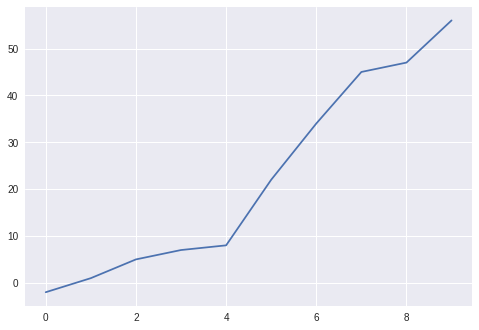

In [11]:
plt.plot(bubblesort(v))

---
# Exercise B
## Exercise 1: NHL Hockey
The file `nhl1617.txt` contains data of all (non-goalie) players in the NHL who had at least some _ice time_, i.e. playing time, in the 2016/2017 regular season - without play offs. Load the CSV data of the file `nhl1617.txt` in Python using `open` and further string transformations (_see below_). Try to cope with the huge string and allocate the information to a dictionary. Use the column names of the dataset as keys for the dictionary.

Solve these tasks using only a dictionary consisting of lists but **not using** _pandas_:

1. How many players have been recorded?
1. A column _points_ ("P") is missing in the data. The number of points of a player is defined as the sum of his _goals_ ("G") and _assists_ ("A"). Add the points to your dictionary.
1. Who is the top scorer in terms of points?
1. How many German (non-goalie) players had some ice time in there 2016/2017 regular season? _Hint: Nationality of a player can be found in the dictionary entry "Nat". Germans are indicated by "DEU"._
1. What are their names? *Hint: Names can be found in th entry "Last_Name" and "First_Name".*
1. Who performed best among the German players in terms of points ("P")?
1. How many points ("P") did he have?
1. How well did he perform in the entire league? Put differently, what was his rank in terms of points?
1. Find the top ten scorers (in terms of points) and print them including their number of point and their respective team.
1. What are the three countries with the most players originating from?
 
If you feel comfortable looping through dictionaries and lists, re-implement your codes **using** _pandas_.


In [12]:
#Mount Google Drive locally
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
#Get a list of my Drive contents
!ls '/content/drive/My Drive/data'

amzn.csv     ex1.csv  goog.xls	   out2.csv  pg.csv	 vote.csv
btc-eur.csv  ex2.csv  nhl1617.txt  out3.csv  sie.de.csv  votingbehavior.txt
dji.csv      ex3.csv  out1.csv	   pfe.csv   tab.txt


In [0]:
#Load and read the NHL data
with open('drive/My Drive/data/nhl1617.txt') as f:
  data = f.read()
  
#Clean the data
data = data.replace('"', '')
data = data.splitlines()
var_names = data[0]
var_names = var_names.rsplit(";")
data.pop(0)
NHL = {}

for keys in var_names:
    NHL[keys] = []

for line in data:
    line = line.rsplit(';')
    for info, keys in zip(line, NHL):
        NHL[keys].append(info)

In [15]:
NHL['Last_Name'][:10]

['Abbott',
 'Abdelkader',
 'Aberg',
 'Acciari',
 'Agostino',
 'Aho',
 'Alzner',
 'Anderson',
 'Andersson',
 'Andreoff']

In [16]:
#Total number of players
n = len(NHL['Last_Name'])
n

888

In [17]:
#Creating the points column
NHL['P'] = []

for G, A in zip(NHL['G'], NHL['A']):
    NHL['P'].append(int(G) + int(A))
  
NHL['P'][:10]

[0, 21, 2, 5, 3, 49, 13, 29, 0, 2]

In [18]:
#Finding the top scoer
max_p = max(NHL['P'])
index = [i for i in range(n) if NHL['P'][i] == max_p]

if len(index) == 1:
    s = ' is'
else:
    s = 's are'

print(f'The top scorer{s}:')
for i in index:
    print(f"{NHL['Last_Name'][i]}, {NHL['First_Name'][i]}")

The top scorer is:
McDavid, Connor


In [19]:
#Finding the German (non-goalie) players of the regular season
index = [i for i in range(n) if NHL['Nat'][i] == 'DEU']

#Alternative approach to getting the above
#count = 0
#for nation in NHL['Nat']:
#  if nation == 'DEU':
#     count += 1

print (f'In the 2016/17 regular season there were {len(index)}'\
       f' German (non-goalie) players:')

for i in index:
    print(f"{NHL['Last_Name'][i]}, {NHL['First_Name'][i]}")

In the 2016/17 regular season there were 5 German (non-goalie) players:
Draisaitl, Leon
Holzer, Korbinian
Kuhnhackl, Tom
Rieder, Tobias
Seidenberg, Dennis


In [20]:
#Finding the German top scorer(s)
ger_p = [NHL['P'][i] for i in index]
max_p = max(ger_p)
index_p = [index[i] for i, p in enumerate(ger_p) if p == max_p]

for i in index_p:
    print(f"{NHL['Last_Name'][i]} (Points: {max_p}) was"\
          f" the best performing German NHL player.")

Draisaitl (Points: 77) was the best performing German NHL player.


In [21]:
#Assessing relative performance
count = 1
for i in NHL['P']:
    if i > max_p:
      count += 1

print(f"{NHL['Last_Name'][index_p[0]]} was the {count}th"\
      f" best performing German player in the entire league.")

Draisaitl was the 8th best performing German player in the entire league.


In [22]:
#Top 10 scorers
index = [i for i, j in sorted(enumerate(NHL['P']),
                              reverse=True,
                              key=lambda x: x[1])]

for i in range(0, 10):
    print(f"{i + 1:2}. {NHL['Last_Name'][index[i]]:15}"
          f"  Team: {NHL['Team'][index[i]]:10}"
          f"  Points: {NHL['P'][index[i]]:3}")

 1. McDavid          Team: EDM         Points: 100
 2. Crosby           Team: PIT         Points:  89
 3. Kane             Team: CHI         Points:  89
 4. Backstrom        Team: WSH         Points:  86
 5. Kucherov         Team: T.B         Points:  85
 6. Marchand         Team: BOS         Points:  85
 7. Scheifele        Team: WPG         Points:  82
 8. Draisaitl        Team: EDM         Points:  77
 9. Burns            Team: S.J         Points:  76
10. Tarasenko        Team: STL         Points:  75


In [23]:
#The three countries with the most players originating from
counts = {}
for nation in NHL['Nat']:
    if nation in counts:
        counts[nation] += 1
    else:
        counts[nation] = 1

top3 = sorted(counts.items(), key=lambda x: x[1], reverse=True)[0:3]
for nation, count in top3:
    print(f"{nation}, {count}")

CAN, 413
USA, 243
SWE, 79


## Exercise 2: Same sex marriage
The file `votingbehavior.txt` contains the voting behavior of all members of the german parliament regarding a draft that aimed to legalise same sex marriage. Party membership is also part of the dataset.

The following list contains the ministers: ['Merkel', 'Altmaier', 'Friedrich, Dr.', 'Leyen', 'Schmidt, Christian', 'Dobrindt', 'Maizière, Dr.', 'Schäuble']
 
Note that _Wanka_ was not part of the German parliament. _Gröhe_ and _Müller_ did not participate in the poll.
 
1. We are interested in the share of voting in favor of same sex marriage grouped by party membership.
2. Display the votings of the members of the CDU/CSU who were also part of the top-level administration.

In [0]:
names = ['Merkel', 'Altmaier', 'Friedrich, Dr.', 'Leyen', 'Schmidt, Christian',
         'Dobrindt', 'Maizière, Dr.', 'Schäuble']

First by using Pandas:

In [25]:
import pandas as pd

df = pd.read_csv('drive/My Drive/data/votingbehavior.txt', sep=';')
df.head(10)

,Assemblyman,Party,Vote
0,"Albani, Stephan",CDU/CSU,Ja
1,"Albsteiger, Katrin",CDU/CSU,Nein
2,"Altmaier, Peter",CDU/CSU,Ja
3,"Auernhammer, Artur",CDU/CSU,Nein
4,"Bär, Dorothee",CDU/CSU,Nein
5,"Bareiß, Thomas",CDU/CSU,Nein
6,"Barthle, Norbert",CDU/CSU,Nein
7,"Baumann, Günter",CDU/CSU,Nein
8,"Beermann, Maik",CDU/CSU,Ja
9,"Behrens, Manfred",CDU/CSU,Nein


In [32]:
#Total votes by each party
res = df.groupby(['Party', 'Vote']).count()
res.columns = ['abs']
res

abs
Party        Vote           
B90/Grüne    Ja           63
CDU/CSU      Enthalten     4
             Ja           75
             Nein        225
             Nicht abg.    5
Die Linke    Ja           63
             Nicht abg.    1
SPD          Ja          192
             Nicht abg.    1
fraktionslos Nein          1

In [33]:
#Relative voting contribution
res['rel'] = res / res.groupby(level=0).sum()
res

abs       rel
Party        Vote                     
B90/Grüne    Ja           63  1.000000
CDU/CSU      Enthalten     4  0.012945
             Ja           75  0.242718
             Nein        225  0.728155
             Nicht abg.    5  0.016181
Die Linke    Ja           63  0.984375
             Nicht abg.    1  0.015625
SPD          Ja          192  0.994819
             Nicht abg.    1  0.005181
fraktionslos Nein          1  1.000000

In [34]:
#Without using the non-votes
res = df[df['Vote'] != 'Nicht abg.'].groupby(['Party', 'Vote']).count()
res.columns = ['abs']
res['rel'] = res / res.groupby(level=0).sum()
res

abs       rel
Party        Vote                    
B90/Grüne    Ja          63  1.000000
CDU/CSU      Enthalten    4  0.013158
             Ja          75  0.246711
             Nein       225  0.740132
Die Linke    Ja          63  1.000000
SPD          Ja         192  1.000000
fraktionslos Nein         1  1.000000

Another solution without using Pandas:

In [41]:
#read the data
with open('drive/My Drive/data/votingbehavior.txt') as f:
    data = f.read()

#clean the data
data = data.replace('"', '')
data = data.splitlines()
var_names = data[0]
var_names = var_names.rsplit(';')
data.pop(0)

vote = {}
for keys in var_names:
    vote[keys] = []
for line in data:
    line = line.rsplit(';')
    for info, keys in zip(line, vote):
        vote[keys].append(info)
        
parties = {}
for party in list(set(vote["Party"])):
    parties[party] = []
for party in parties:
    num_assembly = [1 for i, j in zip(vote["Vote"], vote["Party"])
                    if i != "Nicht abg." and j == party]
    num_assembly = sum(num_assembly)
    share = [1 for i, j in zip(vote["Vote"], vote["Party"])
             if i == "Ja" and j == party]
    share = sum(share) / num_assembly
    parties[party] = share
    
print(parties)

{'Die Linke': 1.0, 'SPD': 1.0, 'fraktionslos': 0.0, 'B90/Grüne': 1.0, 'CDU/CSU': 0.24671052631578946}


In [39]:
#solution to (2) using Pandas
df[df.Assemblyman.str.contains('|'.join(names))]

,Assemblyman,Party,Vote
2,"Altmaier, Peter",CDU/CSU,Ja
33,"Dobrindt, Alexander",CDU/CSU,Nein
52,"Friedrich, Dr. Hans-Peter",CDU/CSU,Nein
155,"Leyen, Dr. Ursula von der",CDU/CSU,Ja
168,"Maizière, Dr. Thomas de",CDU/CSU,Nein
176,"Merkel, Dr. Angela",CDU/CSU,Nein
223,"Schäuble, Dr. Wolfgang",CDU/CSU,Nein
229,"Schmidt, Christian",CDU/CSU,Nein


In [43]:
#solution to (2) without using pandas
index = []

for i in range(0, len(vote['Assemblyman'])):
    for j in names:
        if j in vote['Assemblyman'][i]:
            index.append(i)
            
for i in index:
    assemblyman = vote['Assemblyman'][i]
    name = assemblyman[assemblyman.find(',') + 1:].replace(' ', '')
    name = name + ' ' + assemblyman[0:assemblyman.find(',')]
    print(name, 'voted "%s".' % vote['Vote'][i])

Peter Altmaier voted "Ja".
Alexander Dobrindt voted "Nein".
Dr.Hans-Peter Friedrich voted "Nein".
Dr.Ursulavonder Leyen voted "Ja".
Dr.Thomasde Maizière voted "Nein".
Dr.Angela Merkel voted "Nein".
Dr.Wolfgang Schäuble voted "Nein".
Christian Schmidt voted "Nein".


## Exercise 3: Stock market data
1. Read the file `amzn.csv` into a DataFrame.
1. Read the file `dji.csv` into a new DataFrame.
1. Remove all columns in both DataFrames except _Adj Close_ and _Volume_.
1. Rename columns to _Amzn Adj Close_, _Amzn Volume_, _Dji Adj Close_, _Dji Volume_.


In [44]:
!ls '/content/drive/My Drive/data'

amzn.csv     ex1.csv  goog.xls	   out2.csv  pg.csv	 vote.csv
btc-eur.csv  ex2.csv  nhl1617.txt  out3.csv  sie.de.csv  votingbehavior.txt
dji.csv      ex3.csv  out1.csv	   pfe.csv   tab.txt


In [48]:
amazon = pd.read_csv('drive/My Drive/data/amzn.csv', \
                    index_col=0, parse_dates=True)
amazon.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-23,857.570007,860.859985,848.000000,852.190002,852.190002,3462000
2017-02-24,844.690002,845.809998,837.750000,845.239990,845.239990,3688000
2017-02-27,842.380005,852.500000,839.669983,848.640015,848.640015,2713600
2017-02-28,851.450012,854.090027,842.049988,845.039978,845.039978,2793700
2017-03-01,853.049988,854.830017,849.010010,853.080017,853.080017,2760100


In [47]:
dow = pd.read_csv('drive/My Drive/data/dji.csv', \
                 index_col=0, parse_dates=True)
dow.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-28,10470.580078,10488.389648,10386.559570,10427.200195,10427.200195,358720000
2005-01-31,10428.759766,10510.190430,10428.759766,10489.940430,10489.940430,298060000
2005-02-01,10489.719727,10570.259766,10489.639648,10551.940430,10551.940430,283800000
2005-02-02,10551.049805,10616.370117,10544.480469,10596.790039,10596.790039,279860000
2005-02-03,10592.209961,10601.150391,10550.089844,10593.099609,10593.099609,229000000


In [0]:
#remove all columns except Adj Close and Volume
amazon.drop(['Open', 'High', 'Low', 'Close'], axis=1, inplace=True)
dow.drop(['Open', 'High', 'Low', 'Close'], axis=1, inplace=True)

In [0]:
#rename columns
amazon.rename(columns={'Adj Close': 'Amzn Adj Close',
                      'Volume': 'Amzn Volume'}, inplace=True)
dow.rename(columns={'Adj Close': 'Dji Adj Close',
                   'Volume': 'Dji Volume'}, inplace=True)

In [63]:
amazon.head()

,Amzn Adj Close,Amzn Volume
Date,,
2017-02-23,852.190002,3462000
2017-02-24,845.239990,3688000
2017-02-27,848.640015,2713600
2017-02-28,845.039978,2793700
2017-03-01,853.080017,2760100


In [64]:
dow.head()

,Dji Adj Close,Dji Volume
Date,,
2005-01-28,10427.200195,358720000
2005-01-31,10489.940430,298060000
2005-02-01,10551.940430,283800000
2005-02-02,10596.790039,279860000
2005-02-03,10593.099609,229000000


## Exercise 4: Performances
1. Concatenate both DataFrames along the _Date_ (rows) axis.
1. Remove all rows which contain no data for Amazon.
1. Let _Adj Close_ (2017-02-23) be the reference price (the base). Add two columns which give the _Adj Close_ as a percentage of the reference price.
1. Add a column that contains the 10-days-rolling-correlation between the _Adj Close_ of Amazon and the Dji.
1. Calculate the mean of the correlation columns.

In [65]:
#concatenate both dfs
all_data = pd.concat([amazon, dow], axis=1)
all_data.head()

,Amzn Adj Close,Amzn Volume,Dji Adj Close,Dji Volume
Date,,,,
2005-01-28,NaN,NaN,10427.200195,358720000
2005-01-31,NaN,NaN,10489.940430,298060000
2005-02-01,NaN,NaN,10551.940430,283800000
2005-02-02,NaN,NaN,10596.790039,279860000
2005-02-03,NaN,NaN,10593.099609,229000000


In [0]:
all_data.dropna(axis=0, how='any', inplace=True)

In [67]:
all_data.head()

,Amzn Adj Close,Amzn Volume,Dji Adj Close,Dji Volume
Date,,,,
2017-02-23,852.190002,3462000.0,20810.320313,302110000
2017-02-24,845.239990,3688000.0,20821.759766,292540000
2017-02-27,848.640015,2713600.0,20837.439453,256540000
2017-02-28,845.039978,2793700.0,20812.240234,339210000
2017-03-01,853.080017,2760100.0,21115.550781,392820000


In [0]:
all_data['Amzn Percentage'] = all_data['Amzn Adj Close'] / \
                              all_data['Amzn Adj Close'][0] * 100
all_data['Dji Percentage'] = all_data['Dji Adj Close'] / \
                              all_data['Dji Adj Close'][0] * 100

In [73]:
all_data['Corr'] = all_data['Amzn Adj Close'].rolling(window=10).\
                        corr(all_data['Dji Adj Close'])
all_data.tail()

,Amzn Adj Close,Amzn Volume,Dji Adj Close,Dji Volume,Amzn Percentage,Dji Percentage,Corr
Date,,,,,,,
2018-02-15,1461.760010,5652700.0,25200.369141,416780000,171.529824,121.095537,0.846254
2018-02-16,1448.689941,4472600.0,25219.380859,406730000,169.996120,121.186894,0.929678
2018-02-20,1468.349976,6499200.0,24964.750000,421510000,172.303122,119.963314,0.915655
2018-02-21,1482.920044,6304400.0,24797.779297,456070000,174.012842,119.160969,0.849372
2018-02-22,1485.339966,4792400.0,24962.480469,378900000,174.296807,119.952409,0.856919


In [74]:
all_data['Corr'].mean()

0.36462402245193826

## Exercise 5: Simple trading algorithm
Consider the Amazon DataFrame.
 
1. Add two columns containing the upper and lower Bollinger Band (10-days-rolling-mean +/- standard deviation of the 10-days-rolling-mean).
2. Add a column which says `BUY` if the _Adj Close_ breaks through the lower band (coming from below the lower band) and says `SELL` if the _Adj Close_ falls below the upper band (coming from above the upper band).
3. Write a function that you provide with an initial investment and that computes the total return of investment based on the signals `BUY` and `SELL`.
     1. Specify the amount of money to invest at the beginning.
     1. At every `BUY` signal, you spend the total amount of your money to buy Amazon stocks.
     1. At every `SELL` signal, you sell all stocks again.
     1. At the end of the full period, compute the total return.





In [0]:
#importing the required libraries
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt

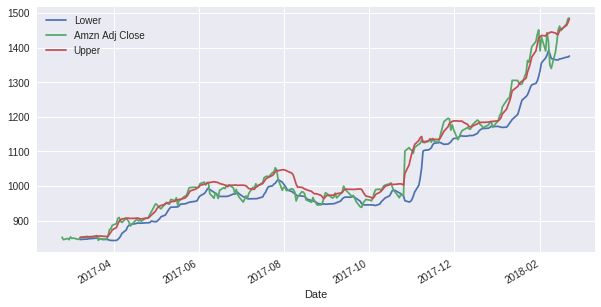

In [80]:
#bollinger bands
amazon['Rolling'] = amazon['Amzn Adj Close'].rolling(window=10).mean()
amazon['Std'] = amazon['Amzn Adj Close'].rolling(window=10).std()
amazon['Upper'] = amazon['Rolling'] + amazon['Std']
amazon['Lower'] = amazon['Rolling'] - amazon['Std']

amazon[['Lower', 'Amzn Adj Close', 'Upper']].plot(figsize=(10, 5))

In [0]:
#buy and sell signals
for i in range(1, len(amazon.index)):
    if amazon['Amzn Adj Close'][i] > amazon['Lower'][i] and \
        amazon['Amzn Adj Close'][i-1] < amazon['Lower'][i-1]:
        amazon.at[amazon.index[i], 'Trade'] = 'BUY'
    
    if amazon['Amzn Adj Close'][i] < amazon['Upper'][i] and \
        amazon['Amzn Adj Close'][i-1] > amazon['Upper'][i-1]:
        amazon.at[amazon.index[i], 'Trade'] = 'SELL'

In [82]:
amazon.head(20)

,Amzn Adj Close,Amzn Volume,Rolling,Std,Upper,Lower,Trade
Date,,,,,,,
2017-02-23,852.190002,3462000,NaN,NaN,NaN,NaN,NaN
2017-02-24,845.239990,3688000,NaN,NaN,NaN,NaN,NaN
2017-02-27,848.640015,2713600,NaN,NaN,NaN,NaN,NaN
2017-02-28,845.039978,2793700,NaN,NaN,NaN,NaN,NaN
2017-03-01,853.080017,2760100,NaN,NaN,NaN,NaN,NaN
2017-03-02,848.909973,2132100,NaN,NaN,NaN,NaN,NaN
2017-03-03,849.880005,1941100,NaN,NaN,NaN,NaN,NaN
2017-03-06,846.609985,2610400,NaN,NaN,NaN,NaN,NaN
2017-03-07,846.020020,2247600,NaN,NaN,NaN,NaN,NaN


In [83]:
amazon.tail(20)

,Amzn Adj Close,Amzn Volume,Rolling,Std,Upper,Lower,Trade
Date,,,,,,,
2018-01-25,1377.949951,4753000,1319.494995,34.854654,1354.349649,1284.640341,NaN
2018-01-26,1402.050049,4857300,1332.031995,39.922253,1371.954248,1292.109742,NaN
2018-01-29,1417.680054,5701900,1343.280005,46.779068,1390.059073,1296.500937,NaN
2018-01-30,1437.819946,5871900,1356.576001,53.112457,1409.688458,1303.463544,NaN
2018-01-31,1450.890015,6424700,1372.165003,55.838813,1428.003816,1316.326189,NaN
2018-02-01,1390.000000,9113800,1381.833008,48.566791,1430.399799,1333.266217,SELL
2018-02-02,1429.949951,11125700,1395.370007,39.578670,1434.948678,1355.791337,NaN
2018-02-05,1390.000000,11495000,1401.639002,31.801324,1433.440325,1369.837678,NaN
2018-02-06,1442.839966,11066800,1409.668994,30.958576,1440.627570,1378.710419,NaN


In [0]:
#Defining a function for algorithmic trading
def algo(amazon, invest, lag=1):
    lastorder = 'SELL'
    stocks = 0
    cash = invest
    for i in range(lag, len(amazon.index)):
        if amazon['Trade'][i-1] == 'BUY' and lastorder == 'SELL':
            stocks = cash / amazon['Amzn Adj Close'][i]
            cash = 0
            lastorder = 'BUY'
            print(f"Buy {stocks:5.2f} stocks on {amazon.index[i].date()}"\
                 f" at a price of {amazon['Amzn Adj Close'][i]:7.2f}")
        if amazon['Trade'][i-lag] == 'SELL' and lastorder == 'BUY':
            print(f"Sell {stocks:4.2f} stocks on {amazon.index[i].date()}"\
                 f" at a price of {amazon['Amzn Adj Close'][i]:7.2f}")
            cash = amazon['Amzn Adj Close'][i] * stocks
            stocks = 0
            lastorder = 'SELL'
    if stocks > 0:
        cash = amazon['Amzn Adj Close'][i] * stocks
    return (cash - invest) / invest * 100

In [87]:
#investing 1,000 USD
invest = 1000
total_return = algo(amazon, invest)
print(f"Your total return of investment is {total_return:.2f} %," \
     f" i.e. {total_return * invest / 100:.2f} USD.")

Buy  1.18 stocks on 2017-03-24 at a price of  845.61
Sell 1.18 stocks on 2017-04-07 at a price of  894.88
Buy  1.17 stocks on 2017-04-18 at a price of  903.78
Sell 1.17 stocks on 2017-05-05 at a price of  934.15
Buy  1.12 stocks on 2017-06-14 at a price of  976.47
Sell 1.12 stocks on 2017-06-27 at a price of  976.78
Buy  1.13 stocks on 2017-07-06 at a price of  965.14
Sell 1.13 stocks on 2017-07-17 at a price of 1010.04
Buy  1.16 stocks on 2017-08-08 at a price of  989.84
Sell 1.16 stocks on 2017-09-06 at a price of  967.80
Buy  1.17 stocks on 2017-09-28 at a price of  956.40
Sell 1.17 stocks on 2017-10-19 at a price of  986.61
Buy  1.05 stocks on 2017-10-27 at a price of 1100.95
Sell 1.05 stocks on 2017-11-03 at a price of 1111.60
Buy  1.01 stocks on 2017-12-07 at a price of 1159.79
Sell 1.01 stocks on 2017-12-21 at a price of 1174.76
Buy  0.98 stocks on 2018-01-03 at a price of 1204.20
Sell 0.98 stocks on 2018-01-19 at a price of 1294.58
Buy  0.90 stocks on 2018-02-13 at a price of 1